In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import os

In [182]:
data = pd.read_csv('https://data.melbourne.vic.gov.au/resource/mffi-m9yn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   census_year        1000 non-null   int64  
 1   block_id           1000 non-null   int64  
 2   property_id        1000 non-null   int64  
 3   base_property_id   1000 non-null   int64  
 4   street_address     1000 non-null   object 
 5   clue_small_area    1000 non-null   object 
 6   trading_name       1000 non-null   object 
 7   number_of_patrons  1000 non-null   int64  
 8   x_coordinate       996 non-null    float64
 9   y_coordinate       996 non-null    float64
 10  geocoded_column    996 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


In [183]:
data = data.dropna()
data.head(2)  

census_year  block_id  property_id  base_property_id  \
0         2002        11       103993            103993   
1         2002        11       108971            108971   

                           street_address  clue_small_area  \
0  508-514 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
1     24-40 Spencer Street MELBOURNE 3000  Melbourne (CBD)   

                             trading_name  number_of_patrons  x_coordinate  \
0  508-514 Flinders Street MELBOURNE 3000                400      144.9572   
1   561-585 Spencer Street MELBOURNE 3000                100      144.9552   

   y_coordinate            geocoded_column  
0      -37.8202  POINT (144.9572 -37.8202)  
1      -37.8202  POINT (144.9552 -37.8202)

In [186]:
Bars_and_pubs = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['x_coordinate'], data['y_coordinate']))
Bars_and_pubs.head(2)

census_year  block_id  property_id  base_property_id  \
0         2002        11       103993            103993   
1         2002        11       108971            108971   

                           street_address  clue_small_area  \
0  508-514 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
1     24-40 Spencer Street MELBOURNE 3000  Melbourne (CBD)   

                             trading_name  number_of_patrons  x_coordinate  \
0  508-514 Flinders Street MELBOURNE 3000                400      144.9572   
1   561-585 Spencer Street MELBOURNE 3000                100      144.9552   

   y_coordinate            geocoded_column                     geometry  
0      -37.8202  POINT (144.9572 -37.8202)  POINT (144.95720 -37.82020)  
1      -37.8202  POINT (144.9552 -37.8202)  POINT (144.95520 -37.82020)

In [193]:
type(Bars_and_pubs['geocoded_column'][0])

str

In [194]:
type(Bars_and_pubs['geometry'][0])

shapely.geometry.point.Point

In [195]:
Bars_and_pubs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   census_year        996 non-null    int64   
 1   block_id           996 non-null    int64   
 2   property_id        996 non-null    int64   
 3   base_property_id   996 non-null    int64   
 4   street_address     996 non-null    object  
 5   clue_small_area    996 non-null    object  
 6   trading_name       996 non-null    object  
 7   number_of_patrons  996 non-null    int64   
 8   x_coordinate       996 non-null    float64 
 9   y_coordinate       996 non-null    float64 
 10  geocoded_column    996 non-null    object  
 11  geometry           996 non-null    geometry
dtypes: float64(2), geometry(1), int64(5), object(4)
memory usage: 133.4+ KB


In [197]:
Bars_and_pubs.crs # NO CRS defined. 

In [198]:
Bars_and_pubs = Bars_and_pubs.set_crs(epsg=4326)
Bars_and_pubs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

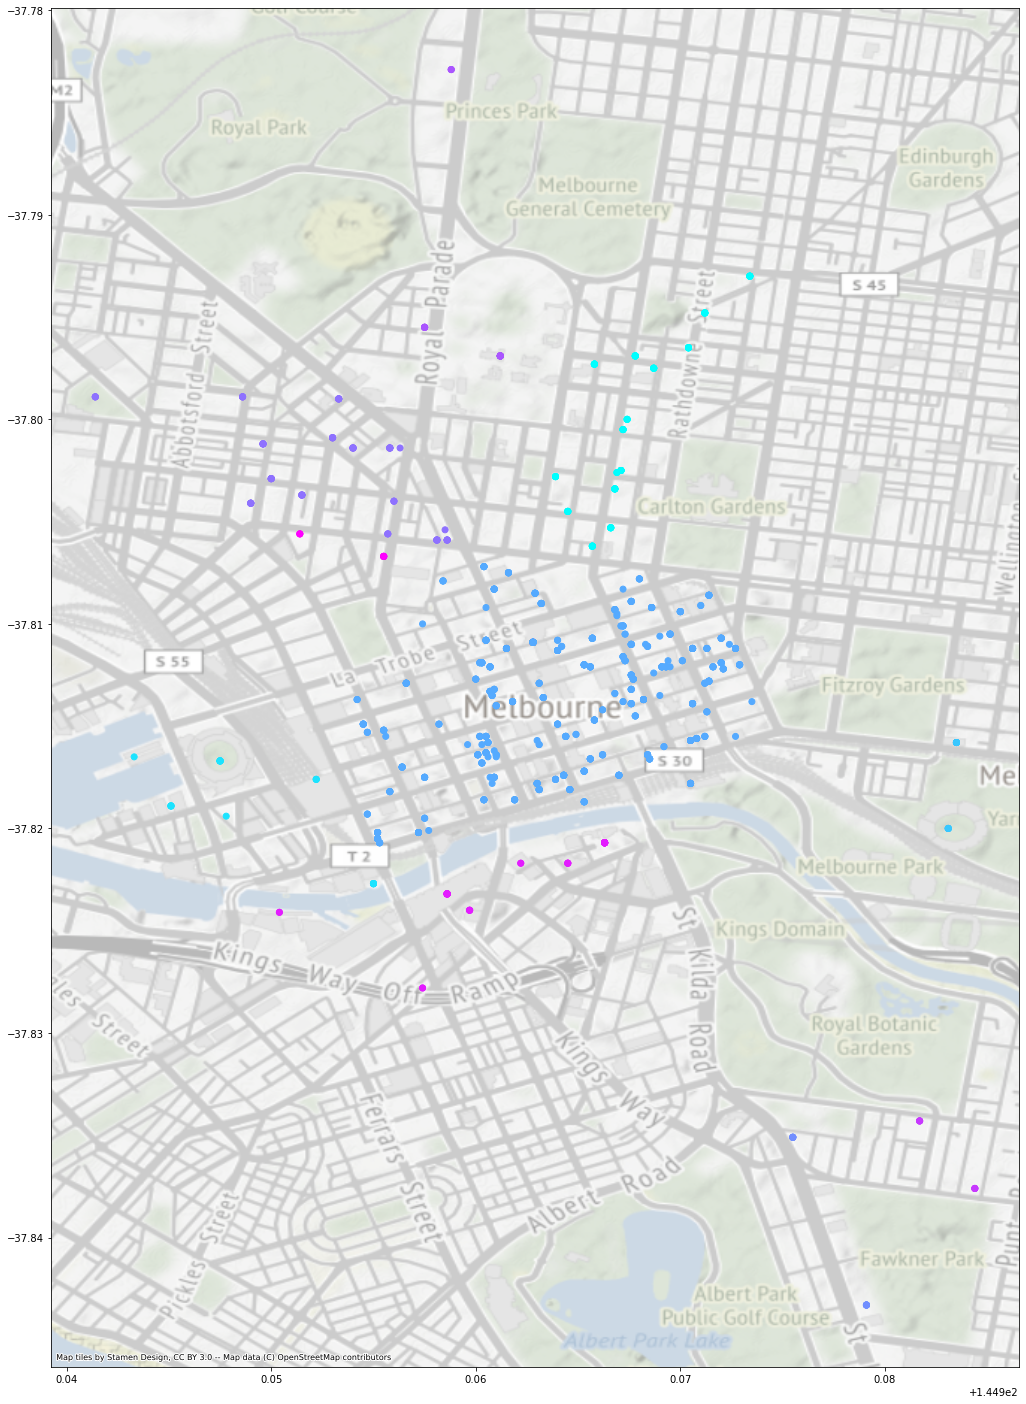

In [80]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)
Bars_and_pubs.plot(column = 'clue_small_area', cmap='cool',ax=ax)
cx.add_basemap(ax,alpha=0.5, crs=Bars_and_pubs.crs)
plt.show()

In [200]:
path = os.path.join('data', 'metro_stations_accessbility', 'metro_stations_accessbility.shp')
metro = gpd.read_file(path)
metro.head()

station        pids he_loop lift                     geometry
0     Alamein          No      No   No  POINT (145.07956 -37.86884)
1      Albion  Dot Matrix      No   No  POINT (144.82471 -37.77766)
2  Alphington  Dot Matrix      No   No  POINT (145.03125 -37.77840)
3      Altona         LCD      No   No  POINT (144.83060 -37.86725)
4      Anstey          No      No   No  POINT (144.96056 -37.76190)

In [202]:
type(metro['geometry'][0])

shapely.geometry.point.Point

In [203]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

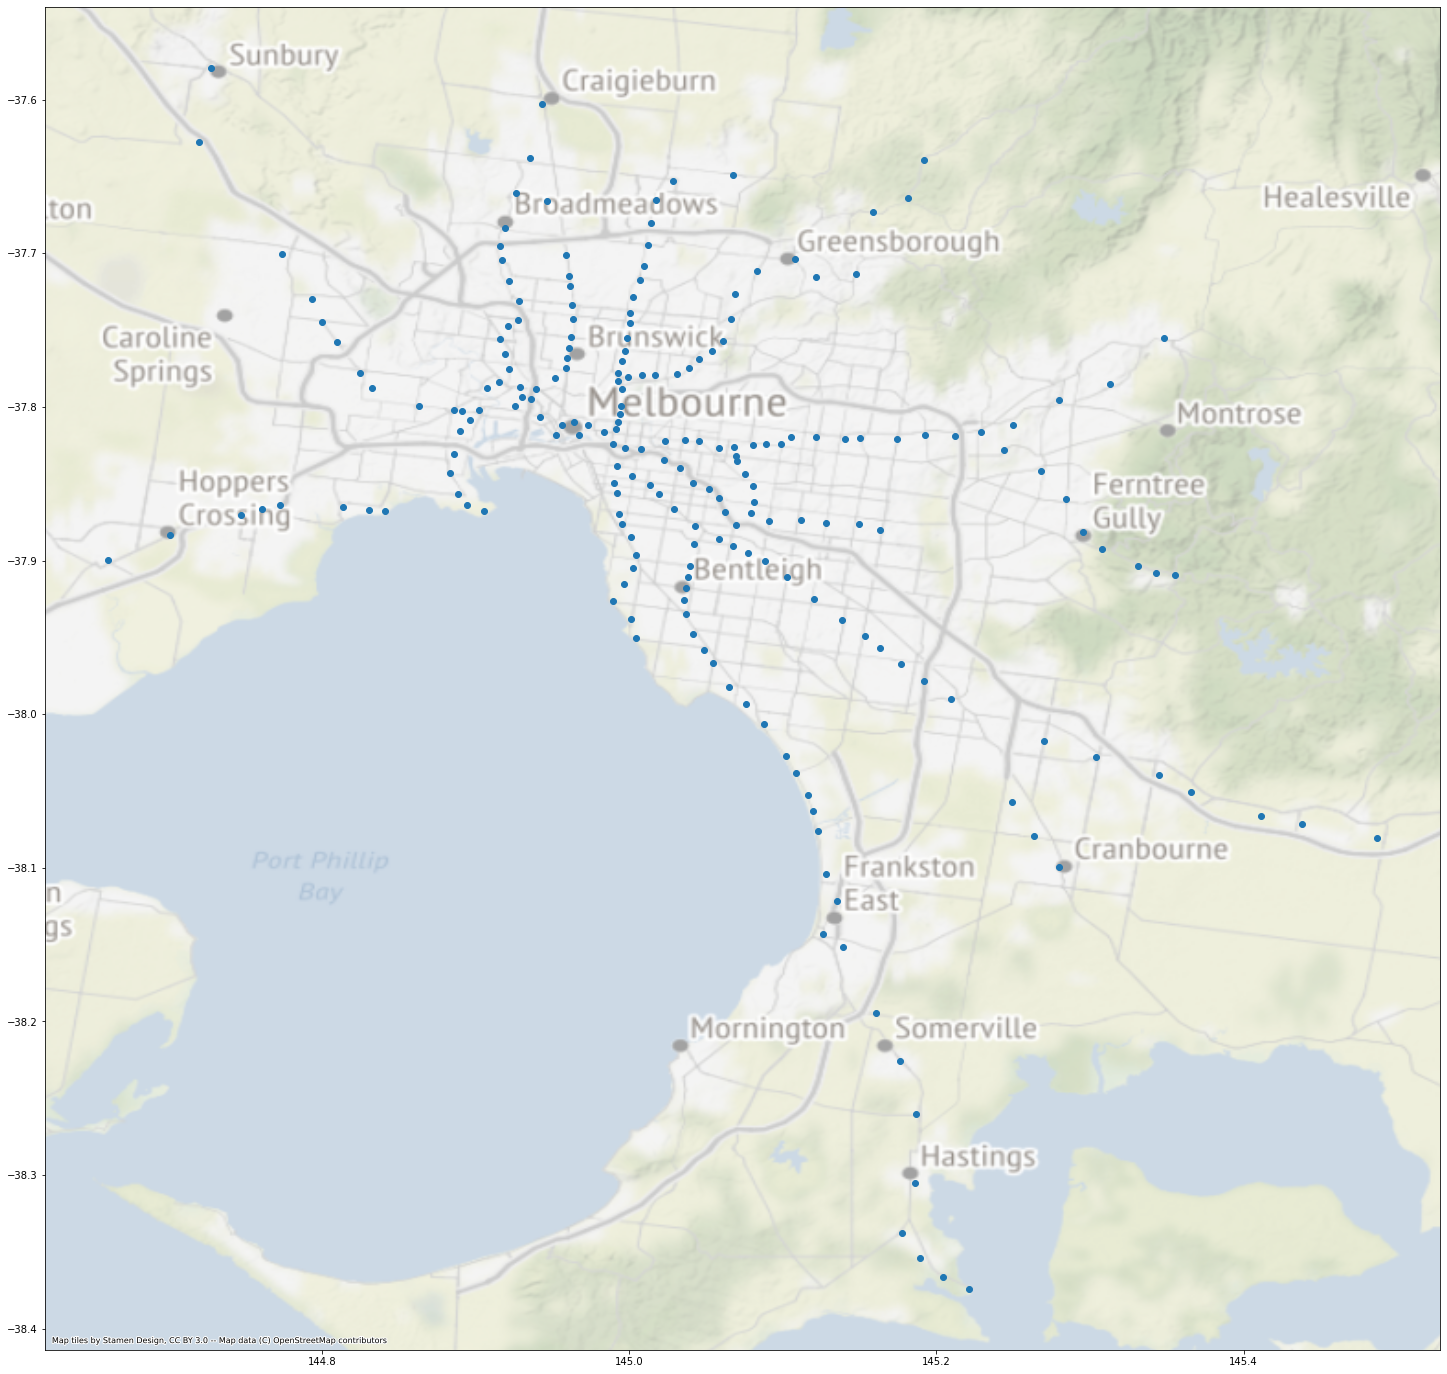

In [83]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)
metro.plot(ax=ax)
cx.add_basemap(ax,alpha=0.5, crs=metro.crs)
plt.show()

In [84]:
metro = metro.to_crs(epsg=7855)
Bars_and_pubs = Bars_and_pubs.to_crs(epsg=7855)

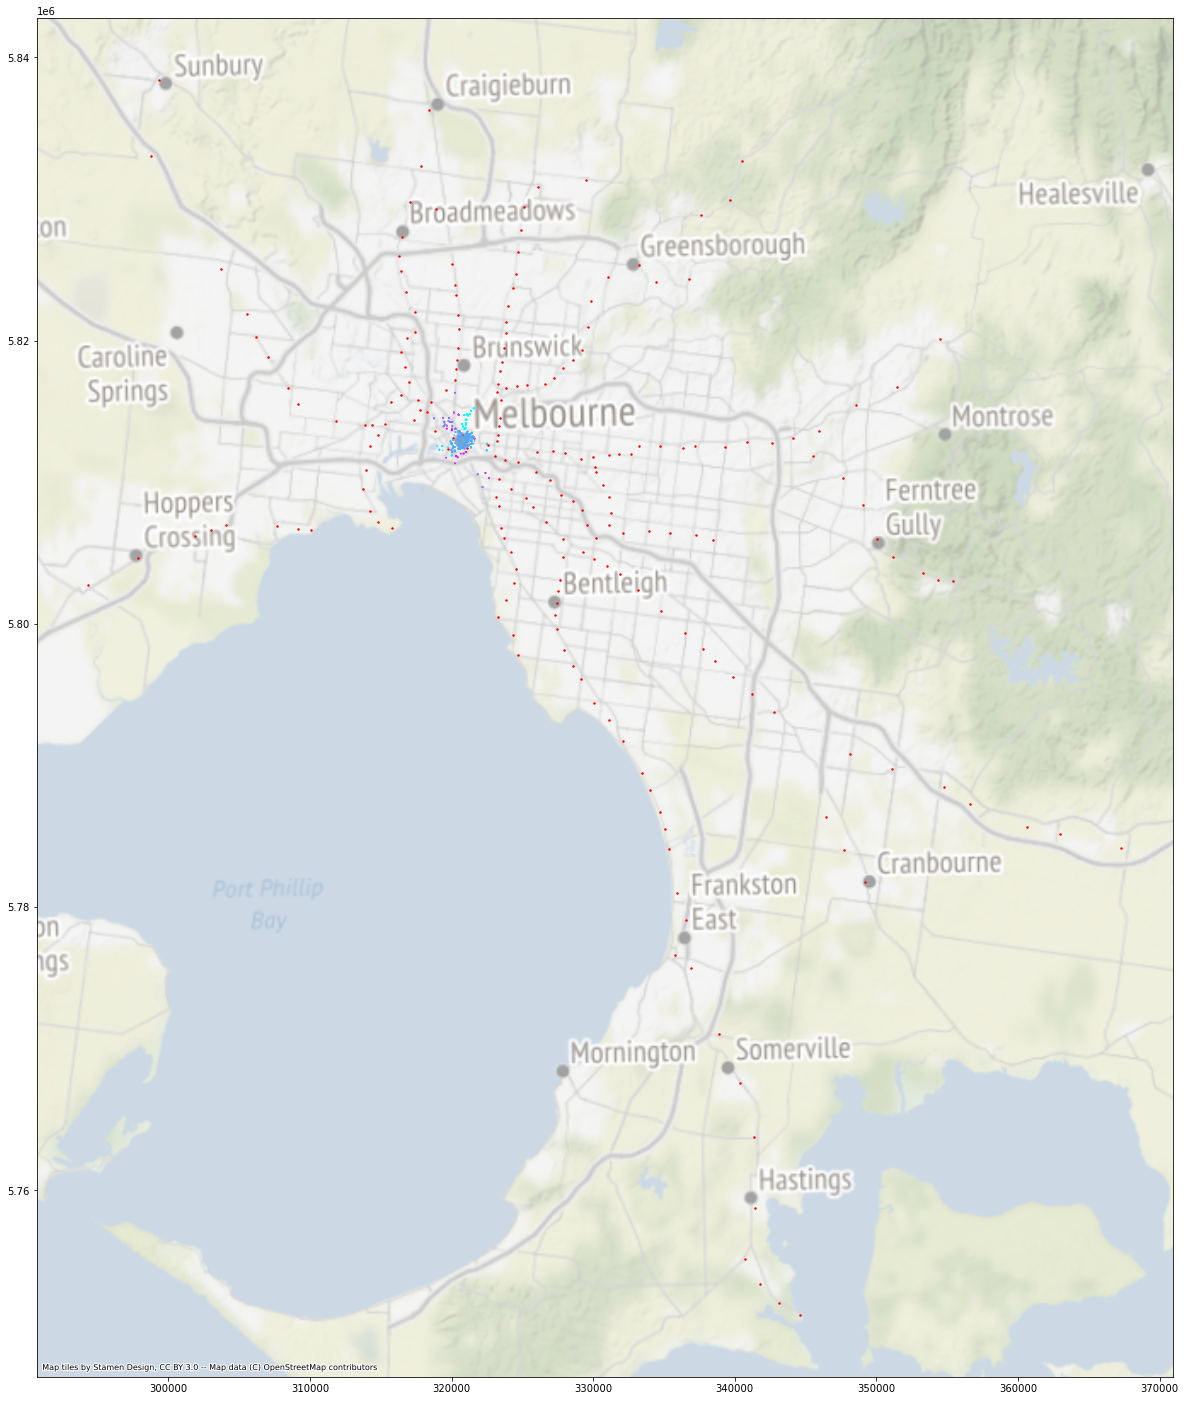

In [93]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)
metro.plot(ax=ax, markersize=2, color='red')
Bars_and_pubs.plot(column = 'clue_small_area', cmap='cool', ax=ax, markersize=0.5)
cx.add_basemap(ax,alpha=0.5, crs=metro.crs)
plt.show()

In [180]:
distance = 500
buffer = metro.buffer(distance)

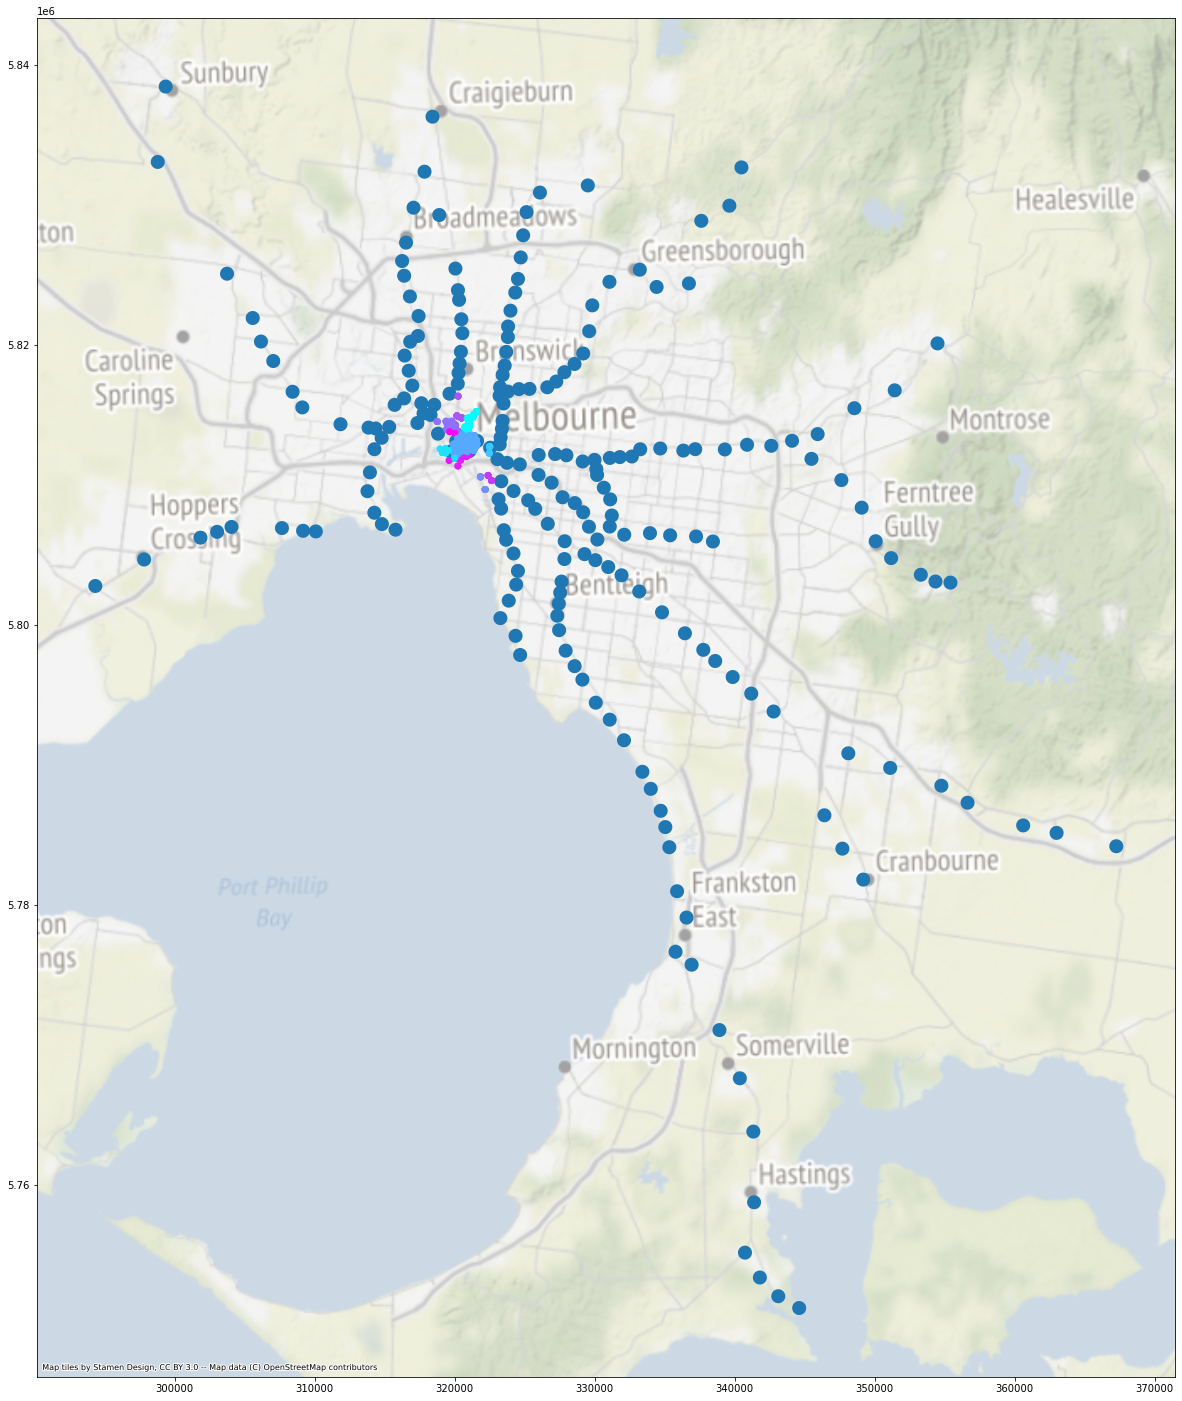

In [104]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)
buffer.plot(ax=ax)
Bars_and_pubs.plot(column = 'clue_small_area', cmap='cool',ax=ax)
cx.add_basemap(ax,alpha=0.5, crs=buffer.crs)
plt.show()

In [208]:
#Returns a geometry containing the union of all geometries

buff_poly = buffer.geometry.unary_union 
type(buff_poly)

shapely.geometry.multipolygon.MultiPolygon

In [209]:
within_buffer = Bars_and_pubs[Bars_and_pubs.geometry.within(buff_poly)]

In [210]:
before_filter = Bars_and_pubs.shape[0]
after_filter = within_buffer.shape[0]
print("Out of {} bar's and pub's, only {} is within {} m radius of a metro station.".format(before_filter, after_filter, distance))

Out of 996 bar's and pub's, only 0 is within 500 m radius of a metro station.


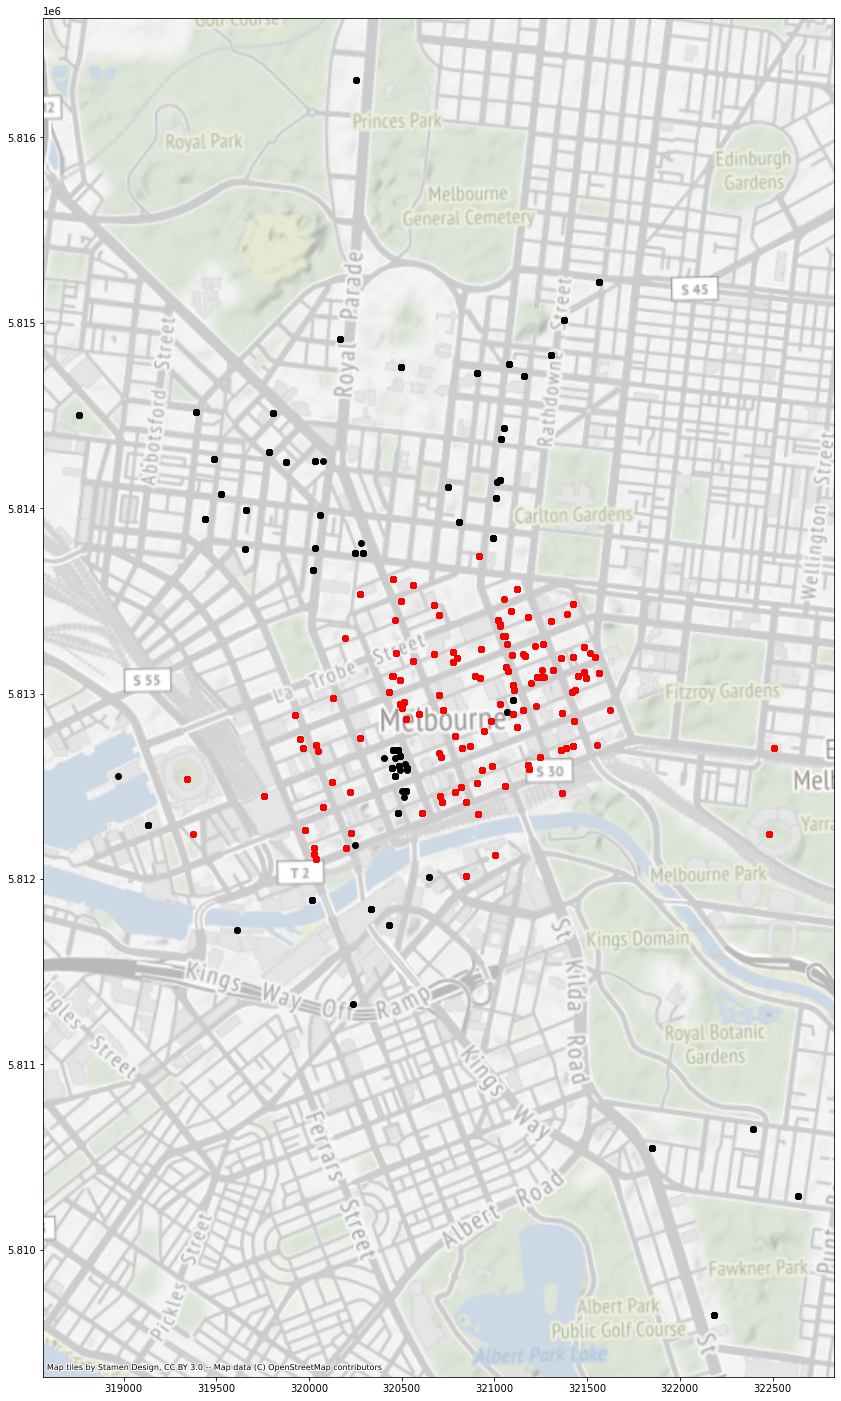

In [176]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)
Bars_and_pubs.plot(ax=ax, color = 'black')
within_buffer.plot(ax=ax, color = 'red')
cx.add_basemap(ax,alpha=0.5, crs=within_buffer.crs)
plt.show()

In [139]:
within_buffer.head()

census_year  block_id  property_id  base_property_id  \
0         2002        11       103993            103993   
1         2002        11       108971            108971   
2         2002        11       108972            108972   
3         2002        13       108058            108058   
4         2002        14       101099            101099   

                           street_address  clue_small_area  \
0  508-514 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
1     24-40 Spencer Street MELBOURNE 3000  Melbourne (CBD)   
2     10-22 Spencer Street MELBOURNE 3000  Melbourne (CBD)   
3        7-11 Queen Street MELBOURNE 3000  Melbourne (CBD)   
4        16-26 Bond Street MELBOURNE 3000  Melbourne (CBD)   

                                trading_name  number_of_patrons  x_coordinate  \
0     508-514 Flinders Street MELBOURNE 3000                400      144.9572   
1      561-585 Spencer Street MELBOURNE 3000                100      144.9552   
2        10-22 Spencer Street MELBOURNE 3000                 50      144.9552   
3  Basement , 11 Queen Street MELBOURNE 3000                210      144.9619   
4  Ground , 20-24 Bond Street MELBOURNE 3000                280      144.9631   

   y_coordinate            geocoded_column                        geometry  
0      -37.8202  POINT (144.9572 -37.8202)  POINT (320201.559 5812169.452)  
1      -37.8202  POINT (144.9552 -37.8202)  POINT (320025.508 5812165.600)  
2      -37.8205  POINT (144.9552 -37.8205)  POINT (320026.237 5812132.310)  
3      -37.8186  POINT (144.9619 -37.8186)  POINT (320611.403 5812356.036)  
4      -37.8181  POINT (144.9631 -37.8181)  POINT (320715.826 5812413.824)

In [172]:
out_path = os.path.join('output', 'bar_pub_near_metro.gpkg')
within_buffer.to_file(out_path, layer='bar_pub_near_metro', driver="GPKG")